In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

df = pd.read_csv('../datasets/anxiety_depression_data.csv')

categorical_columns = ['Gender', 'Education_Level', 'Employment_Status', 'Meditation']
X = df.copy()
X_encoded = pd.get_dummies(X, columns=categorical_columns, prefix=categorical_columns)
X = X_encoded

y = df['Depression_Score']
X = X.drop(['Depression_Score'], axisis=1)

def convert_to_depression_class(score):
    if score < 10:
        return 0  # Mild
    elif score < 20:
        return 1  # Moderate
    else:
        return 2  # Severe

y = y.apply(convert_to_depression_class)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y_class
)

svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

print(f"SVM Accuracy: {accuracy_score(y_test, svm_pred):.4f}")
print(f"Random Forest Accuracy: {accuracy_score(y_test, rf_pred):.4f}")

SVM Accuracy: 0.5194
Random Forest Accuracy: 0.4889


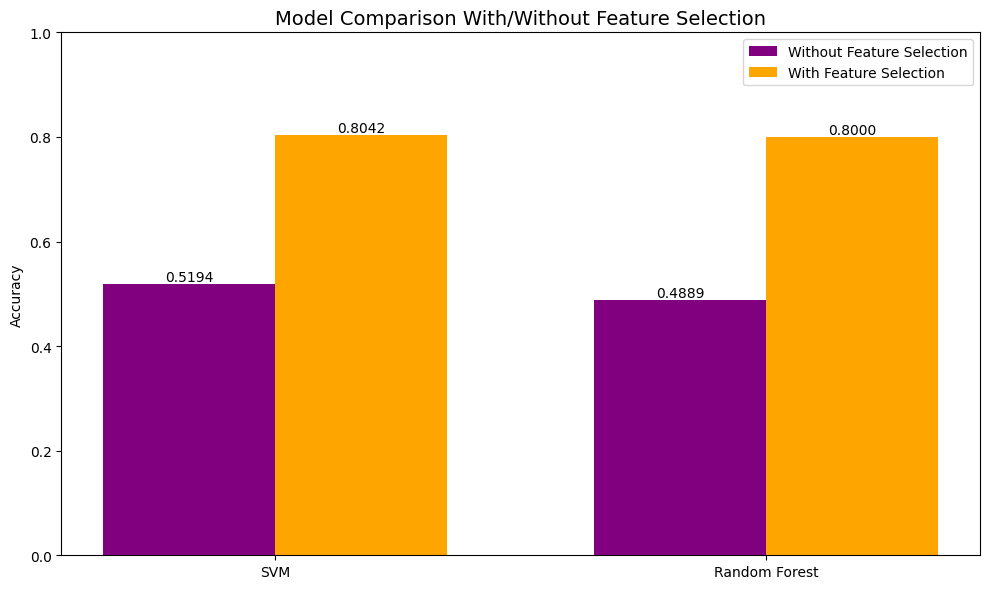

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Accuracy scores
svm_without_fs = accuracy_score(y_test, svm_pred)
rf_without_fs = accuracy_score(y_test, rf_pred)
svm_w_fs = 0.8041666666666667
rf_w_fs = 0.8000

# Data for plotting
models = ['SVM', 'Random Forest']
without_fs = [svm_without_fs, rf_without_fs]
with_fs = [svm_w_fs, rf_w_fs]

x = np.arange(len(models))  # the label locations
width = 0.35  # the width of the bars

fig, axis = plt.subplots(figsize=(10, 6))

# Create bars
svm_bar = axis.bar(x - width/2, without_fs, width, label='Without Feature Selection', color='purple')
rf_bar = axis.bar(x + width/2, with_fs, width, label='With Feature Selection', color='orange')

# Add labels, title and custom x-axisis tick labels
axis.set_ylabel('Accuracy')
axis.set_title('Model Comparison With/Without Feature Selection', fontsize=14)
axis.set_xticks(x)
axis.set_xticklabels(models)
axis.set_ylim(0, 1)
axis.legend()

# Add value labels on top of bars
def autolabel(barr):
    for rect in barr:
        height = rect.get_height()
        axis.annotate(f'{height:.4f}',xy=(rect.get_x() + rect.get_width() / 2, height),ha='center', va='bottom')

autolabel(svm_bar)
autolabel(rf_bar)

plt.tight_layout()
plt.show()